In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("online_shoppers_intention.csv")


In [3]:
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
# Encoding categorical variables
# Convert 'Month' and 'VisitorType' columns to numeric values
data['Month'] = LabelEncoder().fit_transform(data['Month'])
data['VisitorType'] = LabelEncoder().fit_transform(data['VisitorType'])

In [5]:
# Convert 'Weekend' and 'Revenue' (boolean columns) to integers
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

In [6]:
# Splitting data into features and target
X = data.drop('Revenue', axis=1)  # Features
y = data['Revenue']               # Target

In [7]:
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Now X and y are ready for model training
print("Preprocessing complete. Features and target are ready for model training.")

Preprocessing complete. Features and target are ready for model training.


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data has been split into training and testing sets.")

Data has been split into training and testing sets.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Set the style for seaborn
sns.set(style="whitegrid")

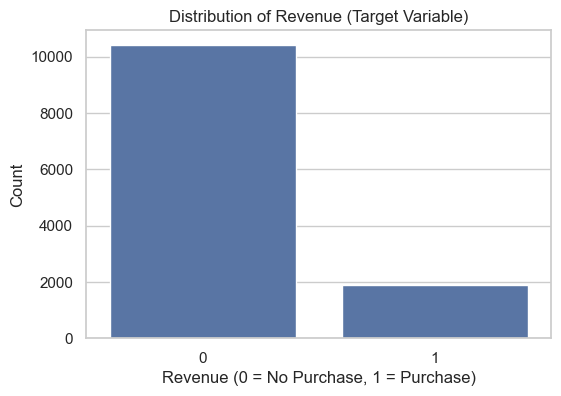

In [13]:
# 1. Distribution of Revenue (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=data)
plt.title('Distribution of Revenue (Target Variable)')
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('Count')
plt.show()

In [14]:
# 2. Distribution of Administrative, Informational, and ProductRelated pages
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Administrative Pages')

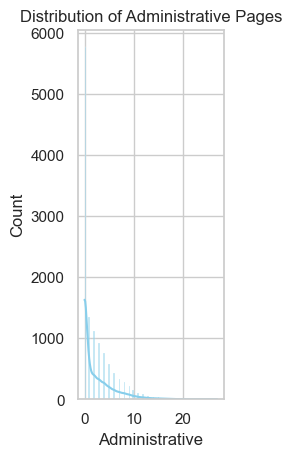

In [15]:

# Administrative
plt.subplot(1, 3, 1)
sns.histplot(data['Administrative'], kde=True, color='skyblue')
plt.title('Distribution of Administrative Pages')

Text(0.5, 1.0, 'Distribution of Informational Pages')

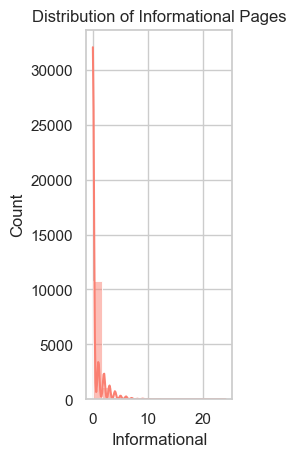

In [16]:
# Informational
plt.subplot(1, 3, 2)
sns.histplot(data['Informational'], kde=True, color='salmon')
plt.title('Distribution of Informational Pages')

Text(0.5, 1.0, 'Distribution of ProductRelated Pages')

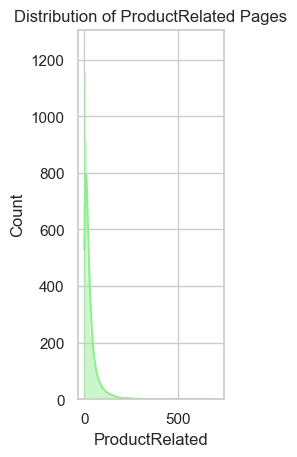

In [17]:
# ProductRelated
plt.subplot(1, 3, 3)
sns.histplot(data['ProductRelated'], kde=True, color='lightgreen')
plt.title('Distribution of ProductRelated Pages')


In [18]:
plt.show()


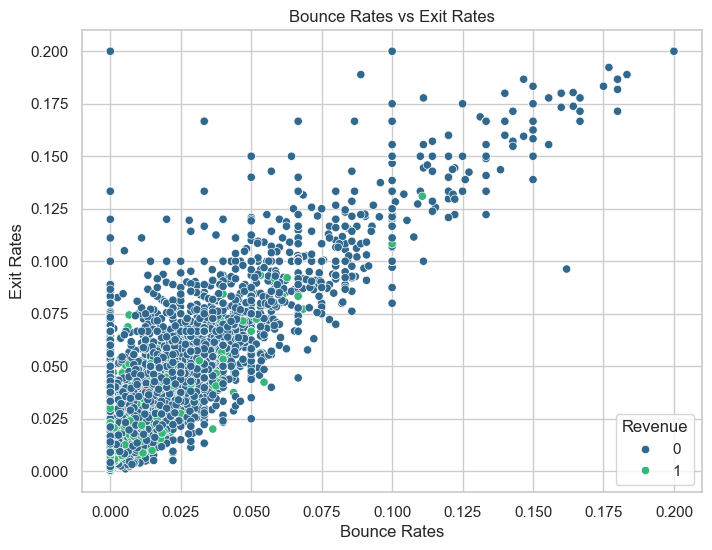

In [19]:
# 3. BounceRates vs ExitRates (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=data, palette='viridis')
plt.title('Bounce Rates vs Exit Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10000\1577419346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y='PageValues', data=data, palette="Set2")


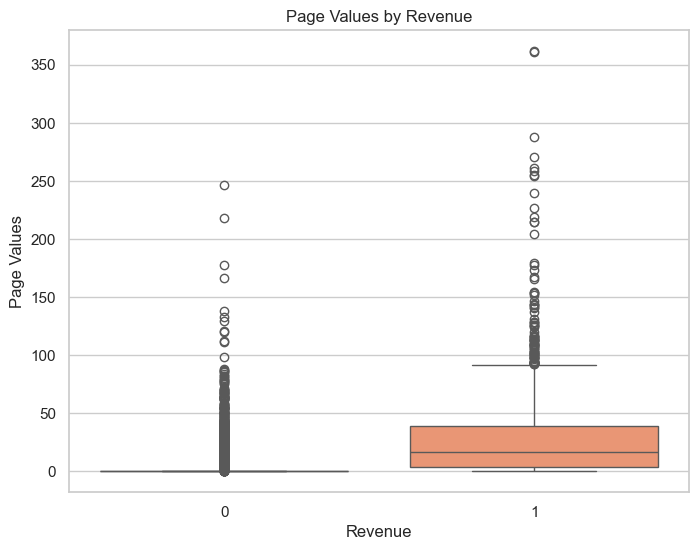

In [20]:
# 4. Page Values by Revenue
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue', y='PageValues', data=data, palette="Set2")
plt.title('Page Values by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Page Values')
plt.show()

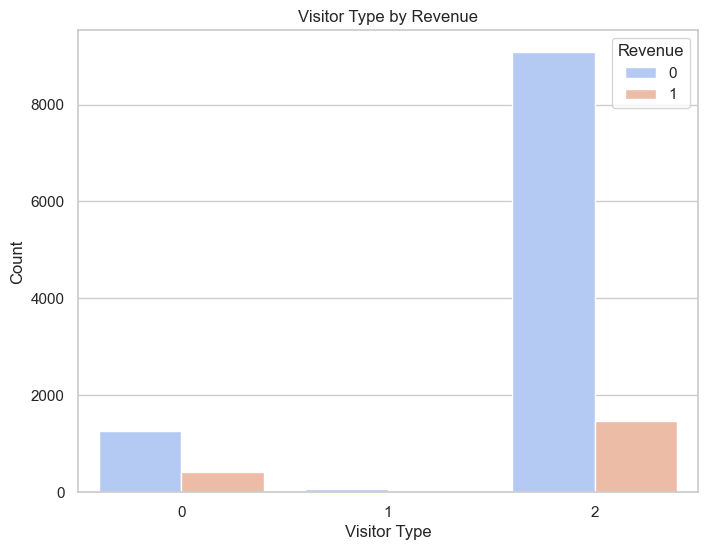

In [21]:

# 5. Visitor Type by Revenue (Count Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', hue='Revenue', data=data, palette="coolwarm")
plt.title('Visitor Type by Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

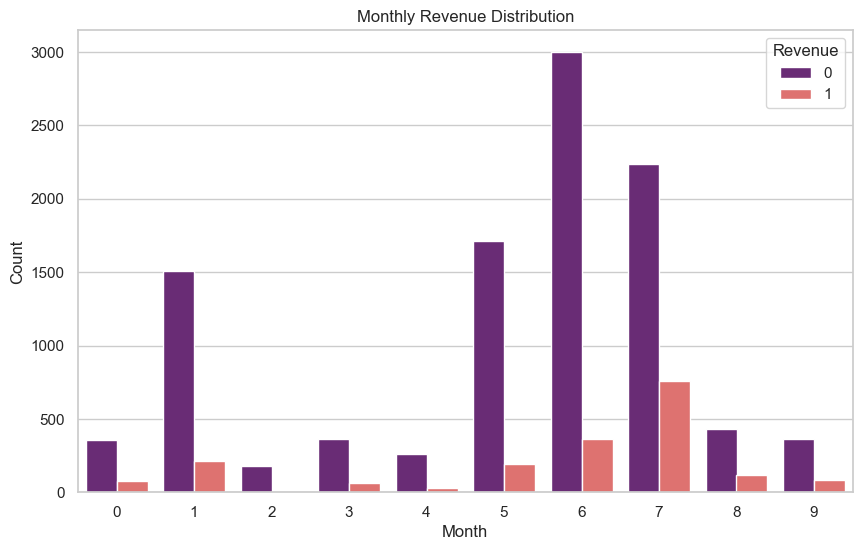

In [22]:
# 6. Monthly Revenue Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Revenue', data=data, palette="magma")
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [23]:
# Assuming X and y are already defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [25]:
# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

In [27]:
# Evaluate Logistic Regression model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_report = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.8690186536901865
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)


Random Forest Accuracy: 0.8957826439578265
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_precision = precision_score(y_test, y_pred_logistic)
logistic_recall = recall_score(y_test, y_pred_logistic)
logistic_f1 = f1_score(y_test, y_pred_logistic)

print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-Score:", logistic_f1)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Model Evaluation:
Accuracy: 0.8690186536901865
Precision: 0.7268041237113402
Recall: 0.34306569343065696
F1-Score: 0.46611570247933887
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466


Random Forest Model Evaluation:
Accuracy: 0.8957826439578265
Precision: 0.7619047619047619
Recall: 0.5450121654501217
F1-Score: 0.6354609929078014
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Load the data
data = pd.read_csv("online_shoppers_intention.csv")  # Replace with your file path

# Step 2: Select numerical features and target
numerical_columns = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']  # Replace with actual column names
target_column = 'Revenue'  # Replace with the actual target column name

X = data[numerical_columns]  # Features
y = data[target_column]      # Target

# Step 3: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Apply the same transformation to test data

# Step 5: Define the model and parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 6: Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Step 7: Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Step 8: Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Step 9: Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 10: Get the best model and evaluate it
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Step 11: Evaluate the model
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest Accuracy: 0.8848337388483374


Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.96      0.93      2055
        True       0.73      0.49      0.59       411

    accuracy                           0.88      2466
   macro avg       0.82      0.73      0.76      2466
weighted avg       0.88      0.88      0.88      2466

Confusion Matrix:
 [[1979   76]
 [ 208  203]]


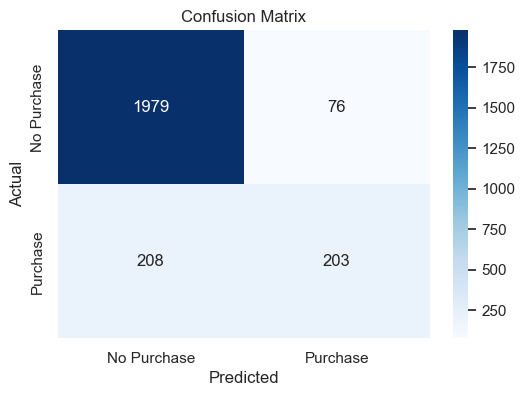

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Detailed evaluation using classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix for more details on predictions
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Purchase", "Purchase"], yticklabels=["No Purchase", "Purchase"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


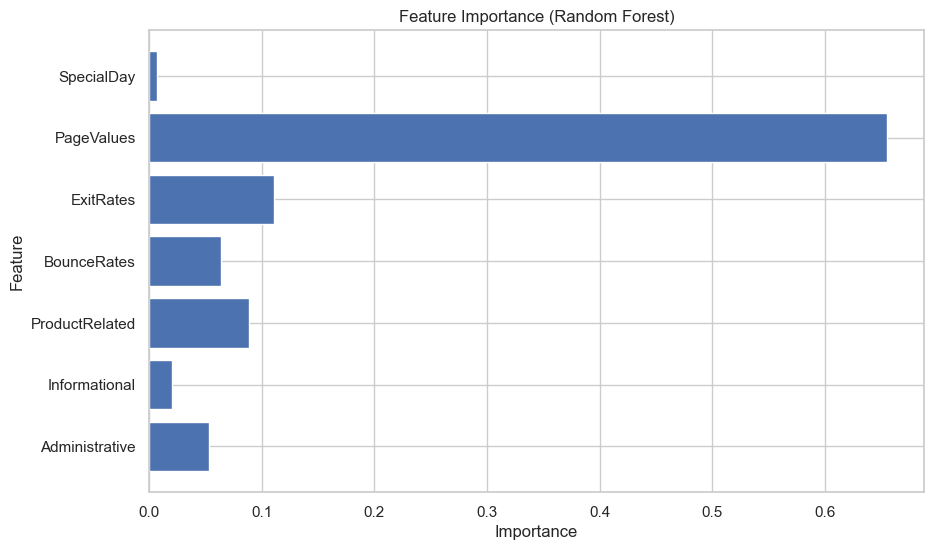

In [32]:
# Get feature importance from the best model (Random Forest)
importances = best_rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Step 2: Train Logistic Regression model
logistic_model.fit(X_train, y_train)

# Step 3: Make predictions using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Step 4: Calculate Accuracy for Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

# Step 5: Print Logistic Regression accuracy and classification report
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8698296836982968
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.74      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.69      2466
weighted avg       0.86      0.87      0.85      2466



In [34]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.92660178 0.90875912 0.88361719 0.86739659 0.88158962]
Average Cross-Validation Accuracy: 0.8935928629359285


In [35]:
pip install --upgrade pip setuptools


In [36]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the saved model
loaded_model = joblib.load('best_rf_model.pkl')

# Make predictions using the loaded model
new_predictions = loaded_model.predict(X_test)


In [37]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X is a pandas DataFrame with valid column names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X should be a pandas DataFrame


In [38]:
X_scaled = scaler.fit_transform(X)  # X is a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Keep feature names


In [39]:
# Avoid this:
X_values = X.to_numpy()
X_scaled = scaler.fit_transform(X_values)

# Instead, use:
X_scaled = scaler.fit_transform(X)


In [40]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example DataFrame (X should be your actual DataFrame)
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8]
})

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform using the DataFrame (keeping feature names)
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame with original feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df)


   feature1  feature2
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641
